### Toronto Parking Tickets - Analysis

#### Name: Nicolas Bolanos

#### DSC-680 Project - 1

#### Case Study for Ticket Analysis:

The study focuses on the number of tickets given in the year 2022. Data was collected from Toronto Open Data official website. This analysis allows the user to understand the data given and the large number of tickets given during that year. This analysis will show the number of parking tickets given to its citizens in 2022. 

#### 1: The Basics: 

Reading data from ticket toronto_violations.csv. This csv file displays records from 2022 fiscal year. The dataset was retrieved from Toronto Open Data and contains records of multiple citations given to drivers in March of 2022

In [30]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
# Import required library
import pandas as pd

# Read data from csv file
df_torca_tx = pd.read_csv('toronto_violations.csv')

In [32]:
df_torca_tx.head(15)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***89964,20221212,8,STAND VEH.-PROHIBIT TIME/DAY,100,947.0,NR,105 VICTORIA ST,NaN,NaN,AZ
1,***05827,20221212,8,STAND VEH.-PROHIBIT TIME/DAY,100,947.0,NR,111 RICHMOND ST W,NaN,NaN,ON
2,***06121,20221212,29,PARK PROHIBITED TIME NO PERMIT,30,947.0,NR,258 MARKHAM ST,NaN,NaN,ON
3,***09228,20221212,29,PARK PROHIBITED TIME NO PERMIT,30,947.0,NR,185 HILLSDALE AVE E,NaN,NaN,ON
4,***42648,20221212,347,PARK IN A FIRE ROUTE,250,948.0,NaN,10 CHICHESTER PL,NaN,NaN,ON
5,***60161,20221212,4,PARK ON MUNICIPAL PROPERTY,30,948.0,AT,54 DALHOUSIE STREET,NaN,NaN,ON
6,***75043,20221212,336,PARK-FAIL TO DISPLAY PERMIT,30,948.0,NR,82 BARTON AVE,NaN,NaN,ON
7,***49796,20221212,336,PARK-FAIL TO DISPLAY PERMIT,30,948.0,NR,21 KENNEDY PARK RD,NaN,NaN,ON
8,***05106,20221212,8,STAND VEH.-PROHIBIT TIME/DAY,100,948.0,N/S,ELGIN AVE,W/O,AVENUE RD,ON
9,***17398,20221212,48,FAIL TO PARK/STOP PARALL. CURB,30,948.0,NR,5 PAGE ST,NaN,NaN,ON


In [33]:
df_torca_tx.tail(15)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
71873,***30508,20221231,8,STAND VEH.-PROHIBIT TIME/DAY,100,2351.0,N/S,DUNDAS ST W,W/O,YONGE ST,ON
71874,***38656,20221231,8,STAND VEH.-PROHIBIT TIME/DAY,100,2351.0,NR,55 MERCHANTS' WHARF,NaN,NaN,ON
71875,***69327,20221231,8,STAND VEH.-PROHIBIT TIME/DAY,100,2352.0,S/S,DUNDAS ST W,W/O,YONGE ST,ON
71876,***28594,20221231,8,STAND VEH.-PROHIBIT TIME/DAY,100,2352.0,E/S,PORTLAND ST,N/O,STEWART ST,ON
71877,***30509,20221231,8,STAND VEH.-PROHIBIT TIME/DAY,100,2352.0,N/S,DUNDAS ST W,W/O,YONGE ST,ON
71878,***38657,20221231,8,STAND VEH.-PROHIBIT TIME/DAY,100,2352.0,NR,55 MERCHANTS' WHARF,NaN,NaN,ON
71879,***38658,20221231,8,STAND VEH.-PROHIBIT TIME/DAY,100,2352.0,NR,55 MERCHANTS' WHARF,NaN,NaN,ON
71880,***69328,20221231,8,STAND VEH.-PROHIBIT TIME/DAY,100,2353.0,S/S,DUNDAS ST W,W/O,YONGE ST,ON
71881,***38659,20221231,8,STAND VEH.-PROHIBIT TIME/DAY,100,2353.0,NR,55 MERCHANTS' WHARF,NaN,NaN,ON
71882,***69329,20221231,8,STAND VEH.-PROHIBIT TIME/DAY,100,2354.0,S/S,DUNDAS ST W,W/O,YONGE ST,ON


In [34]:
df_torca_tx.shape

(71888, 11)

In [35]:
df_torca_tx.describe

<bound method NDFrame.describe of       tag_number_masked  date_of_infraction  infraction_code  \
0              ***89964            20221212                8   
1              ***05827            20221212                8   
2              ***06121            20221212               29   
3              ***09228            20221212               29   
4              ***42648            20221212              347   
...                 ...                 ...              ...   
71883          ***30510            20221231                8   
71884          ***23740            20221231               15   
71885          ***23741            20221231                5   
71886          ***95923            20221231              369   
71887          ***43230            20221231                3   

               infraction_description  set_fine_amount  time_of_infraction  \
0        STAND VEH.-PROHIBIT TIME/DAY              100               947.0   
1        STAND VEH.-PROHIBIT TIME/DAY    

In [36]:
# Method prints basic information about Dataset
df_torca_tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71888 entries, 0 to 71887
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tag_number_masked       71888 non-null  object 
 1   date_of_infraction      71888 non-null  int64  
 2   infraction_code         71888 non-null  int64  
 3   infraction_description  71888 non-null  object 
 4   set_fine_amount         71888 non-null  int64  
 5   time_of_infraction      71865 non-null  float64
 6   location1               64332 non-null  object 
 7   location2               71887 non-null  object 
 8   location3               5272 non-null   object 
 9   location4               5276 non-null   object 
 10  province                71888 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 6.0+ MB


In [37]:
# Convert 'Issue Date' data type to 'date'
df_torca_tx['date_of_infraction'] = pd.to_datetime(df_torca_tx['date_of_infraction'])

In [38]:
df_torca_tx.head(5)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***89964,1970-01-01 00:00:00.020221212,8,STAND VEH.-PROHIBIT TIME/DAY,100,947.0,NR,105 VICTORIA ST,NaN,NaN,AZ
1,***05827,1970-01-01 00:00:00.020221212,8,STAND VEH.-PROHIBIT TIME/DAY,100,947.0,NR,111 RICHMOND ST W,NaN,NaN,ON
2,***06121,1970-01-01 00:00:00.020221212,29,PARK PROHIBITED TIME NO PERMIT,30,947.0,NR,258 MARKHAM ST,NaN,NaN,ON
3,***09228,1970-01-01 00:00:00.020221212,29,PARK PROHIBITED TIME NO PERMIT,30,947.0,NR,185 HILLSDALE AVE E,NaN,NaN,ON
4,***42648,1970-01-01 00:00:00.020221212,347,PARK IN A FIRE ROUTE,250,948.0,NaN,10 CHICHESTER PL,NaN,NaN,ON


##### Due to Toronto Laws the original date of infraction or issue date is generic. All data points to December of 2022

 #### 2. Display a Graphical Representation of parking violations issued for each vehicle and year

In [39]:
df_torca_tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71888 entries, 0 to 71887
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tag_number_masked       71888 non-null  object        
 1   date_of_infraction      71888 non-null  datetime64[ns]
 2   infraction_code         71888 non-null  int64         
 3   infraction_description  71888 non-null  object        
 4   set_fine_amount         71888 non-null  int64         
 5   time_of_infraction      71865 non-null  float64       
 6   location1               64332 non-null  object        
 7   location2               71887 non-null  object        
 8   location3               5272 non-null   object        
 9   location4               5276 non-null   object        
 10  province                71888 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 6.0+ MB


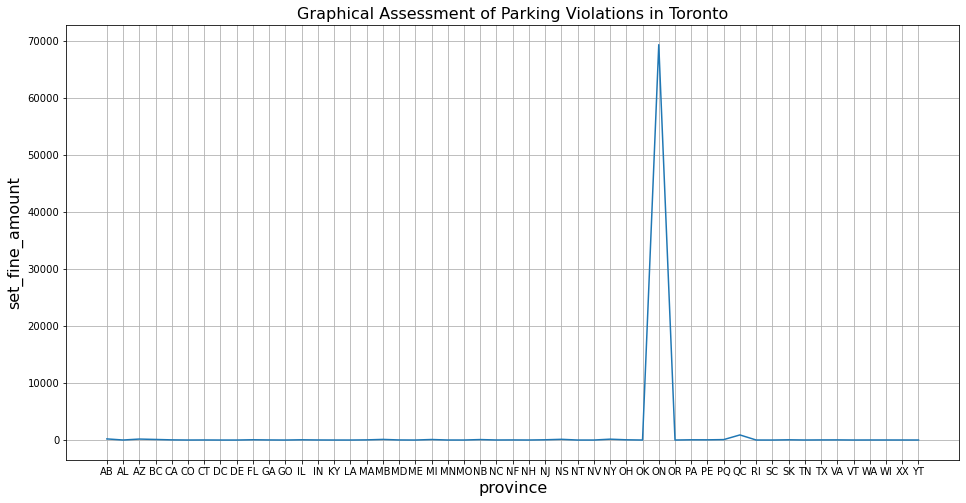

In [40]:
# Import required library

import matplotlib.pyplot as plt

# Use GroupBy method to use with plot
df_torca_tx_vehicle_year= df_torca_tx.groupby('province')['set_fine_amount'].count()

# Plot shows number of Parking Violations issued for each vehicle year
plt.figure(figsize=(16, 8))

plt.xlabel('province',fontsize=16)
plt.ylabel('set_fine_amount',fontsize=16)

plt.grid(True)

plt.title('Graphical Assessment of Parking Violations in Toronto', fontsize=16)




plt.plot(df_torca_tx_vehicle_year)
plt.show()

#### 3. Identify the top 20 violation codes for vehicles that are registered outside Ontario.

In [93]:
# Identifying total number of infractions by description
df_torca_tx[df_torca_tx['province'] != 'ON'].groupby('infraction_description')['infraction_code'].count().nlargest(20).reset_index(name='Count')

,infraction_description,Count
0,PARK ON PRIVATE PROPERTY,670
1,PARK PROHIBITED TIME NO PERMIT,417
2,PARK MACHINE-REQD FEE NOT PAID,308
3,PARK-SIGNED HWY-PROHIBIT DY/TM,304
4,STOP-SIGNED HIGHWAY-RUSH HOUR,129
5,STOP-SIGNED HWY-PROHIBIT TM/DY,124
6,PARK-N.YORK 2AM-6AM DEC1-MAR31,108
7,PARK ON MUNICIPAL PROPERTY,90
8,STAND VEH.-PROHIBIT TIME/DAY,76
9,PARK - LONGER THAN 3 HOURS,70


In [91]:
# Identifying total number of infractions by code

df_torca_tx[df_torca_tx['province'] != 'ON'].groupby('infraction_code')['infraction_code'].count().nlargest(20).reset_index(name='Count')

,infraction_code,Count
0,3,670
1,29,417
2,207,308
3,5,304
4,403,129
5,9,124
6,28,108
7,4,90
8,8,76
9,2,70


#### 4. Graphical Representation of Number of Tickets Given by Location or Canadian Province

<function matplotlib.pyplot.show(close=None, block=None)>

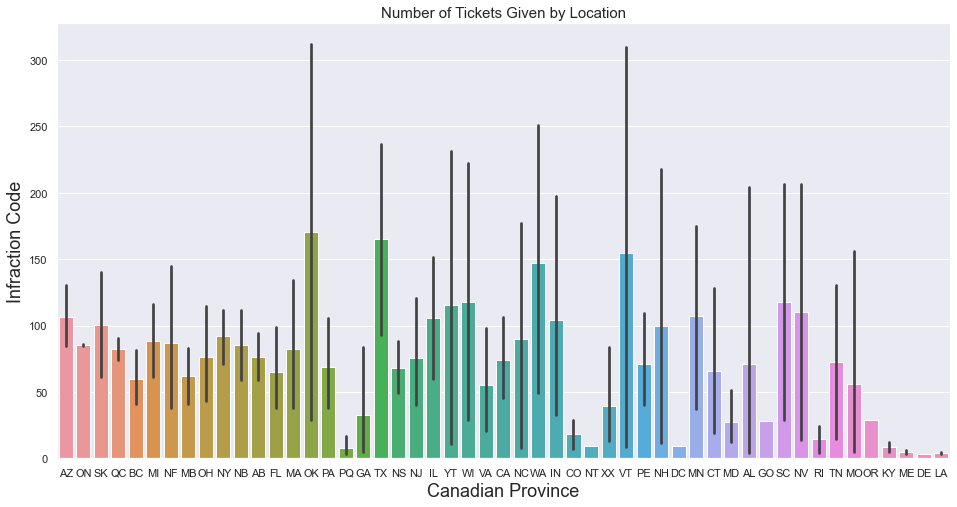

In [90]:
pdDF_tor = df_torca_tx
import seaborn as sns
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='province', y='infraction_code', data=df_torca_tx)

ax.set_ylabel("Infraction Code", fontsize=18);
ax.set_title('Number of Tickets Given by Location',fontsize=15)
ax.set_xlabel("Canadian Province", fontsize=18);


plt.show

#### 5. Exploring Time Stamp and Type of Infractions

In [46]:
df_torca_tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71888 entries, 0 to 71887
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tag_number_masked       71888 non-null  object        
 1   date_of_infraction      71888 non-null  datetime64[ns]
 2   infraction_code         71888 non-null  int64         
 3   infraction_description  71888 non-null  object        
 4   set_fine_amount         71888 non-null  int64         
 5   time_of_infraction      71865 non-null  float64       
 6   location1               64332 non-null  object        
 7   location2               71887 non-null  object        
 8   location3               5272 non-null   object        
 9   location4               5276 non-null   object        
 10  province                71888 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 6.0+ MB


In [48]:
# Import required library
import pandas as pd

# Read data from csv file
df_torca_tx = pd.read_csv('toronto_violations.csv')

In [49]:
df_torca_tx.head(5)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***89964,20221212,8,STAND VEH.-PROHIBIT TIME/DAY,100,947.0,NR,105 VICTORIA ST,NaN,NaN,AZ
1,***05827,20221212,8,STAND VEH.-PROHIBIT TIME/DAY,100,947.0,NR,111 RICHMOND ST W,NaN,NaN,ON
2,***06121,20221212,29,PARK PROHIBITED TIME NO PERMIT,30,947.0,NR,258 MARKHAM ST,NaN,NaN,ON
3,***09228,20221212,29,PARK PROHIBITED TIME NO PERMIT,30,947.0,NR,185 HILLSDALE AVE E,NaN,NaN,ON
4,***42648,20221212,347,PARK IN A FIRE ROUTE,250,948.0,NaN,10 CHICHESTER PL,NaN,NaN,ON


In [54]:
# Checking Time Stamp range of infractions
df_torca_tx['date_of_infraction'].min(),df_torca_tx['date_of_infraction'].max()

(20221212, 20221231)

In [55]:
# Identifying common statistics of date of infraction variable
df_torca_tx['date_of_infraction'].value_counts().describe()

count      20.00000
mean     3594.40000
std      1456.58676
min       602.00000
25%      2765.50000
50%      3933.00000
75%      4626.75000
max      5601.00000
Name: date_of_infraction, dtype: float64

In [56]:
# # Identifying common statistics of infraction description variable
df_torca_tx['infraction_description']. value_counts().describe()

count       90.000000
mean       798.755556
std       2491.905693
min          1.000000
25%          3.000000
50%         17.000000
75%        198.250000
max      17608.000000
Name: infraction_description, dtype: float64

In [57]:
# Total of infractions plus description of each
df_torca_tx['infraction_description']. value_counts().head(10)

PARK ON PRIVATE PROPERTY          17608
PARK PROHIBITED TIME NO PERMIT     9936
PARK MACHINE-REQD FEE NOT PAID     8399
PARK-SIGNED HWY-PROHIBIT DY/TM     8310
PARK-N.YORK 2AM-6AM DEC1-MAR31     3672
STOP-SIGNED HWY-PROHIBIT TM/DY     3559
STOP-SIGNED HIGHWAY-RUSH HOUR      3198
PARK - LONGER THAN 3 HOURS         2720
PARK ON MUNICIPAL PROPERTY         2178
PARKING MACH-NOT USED/NO FEE       2045
Name: infraction_description, dtype: int64

In [58]:
df_torca_tx['infraction_code']. value_counts().describe()

count       92.000000
mean       781.391304
std       2467.139715
min          1.000000
25%          3.000000
50%         14.000000
75%        178.750000
max      17608.000000
Name: infraction_code, dtype: float64

In [59]:
# Total of infraction code counts from highest to lowest
df_torca_tx['infraction_code']. value_counts().head(10)

3      17608
29      9936
207     8399
5       8310
28      3672
9       3559
403     3198
2       2720
4       2178
312     2045
Name: infraction_code, dtype: int64

#### 6. Data Exploration To Streets and Locations 

In [60]:
df_torca_tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71888 entries, 0 to 71887
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tag_number_masked       71888 non-null  object 
 1   date_of_infraction      71888 non-null  int64  
 2   infraction_code         71888 non-null  int64  
 3   infraction_description  71888 non-null  object 
 4   set_fine_amount         71888 non-null  int64  
 5   time_of_infraction      71865 non-null  float64
 6   location1               64332 non-null  object 
 7   location2               71887 non-null  object 
 8   location3               5272 non-null   object 
 9   location4               5276 non-null   object 
 10  province                71888 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 6.0+ MB


In [64]:
# Assign new variable 'street' to replace location 2 for analysis
df_torca_tx['street'] = df_torca_tx['location2'].str.replace(r"\d+",'', regex=True)

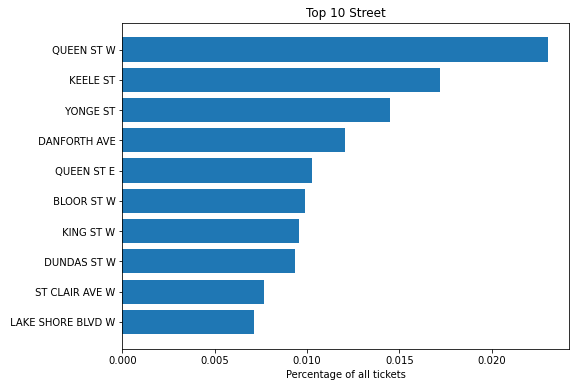

In [62]:
# Plot of Top 10 Street with percentage of tickets

plot_df = df_torca_tx['street'].value_counts(normalize=True).head(10)[::-1]
plt.figure(figsize=(8,6))
plt.barh(plot_df.index, plot_df.values)
plt.xlabel('Percentage of all tickets')
plt.title('Top 10 Street')
plt.show()

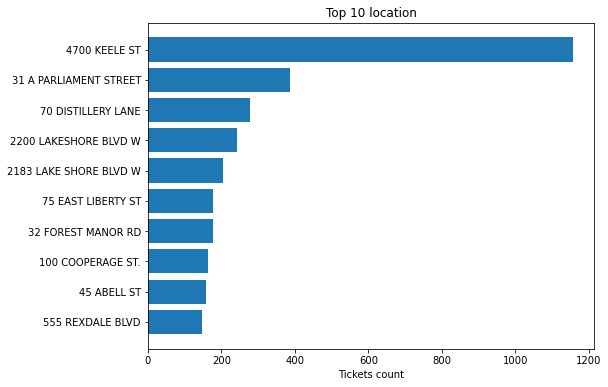

In [65]:
# Plot of Top 10 location of tickets count

plot_df = df_torca_tx['location2'].value_counts().head(10)[::-1]
plt.figure(figsize=(8,6))
plt.barh(plot_df.index, plot_df.values)
plt.xlabel('Tickets count')
plt.title('Top 10 location')
plt.show()

#### 7. Number of Parking Tickets based on location

In [85]:
df_torca_tx['location2'].value_counts().head(10)

4700 KEELE ST             1157
31 A PARLIAMENT STREET     386
70 DISTILLERY LANE         279
2200 LAKESHORE BLVD W      241
2183 LAKE SHORE BLVD W     205
75 EAST LIBERTY ST         178
32 FOREST MANOR RD         178
100 COOPERAGE ST.          164
45 ABELL ST                159
555 REXDALE BLVD           146
Name: location2, dtype: int64

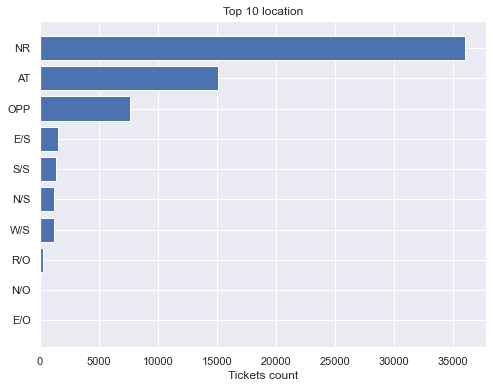

In [87]:
# Plot of Top 10 location of tickets count

plot_df = df_torca_tx['location1'].value_counts().head(10)[::-1]
plt.figure(figsize=(8,6))
plt.barh(plot_df.index, plot_df.values)
plt.xlabel('Tickets count')
plt.title('Top 10 location')
plt.show()

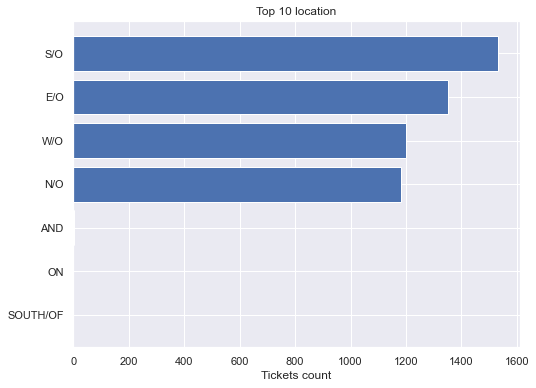

In [88]:
# Plot of Top 10 location3 of tickets count

plot_df = df_torca_tx['location3'].value_counts().head(10)[::-1]
plt.figure(figsize=(8,6))
plt.barh(plot_df.index, plot_df.values)
plt.xlabel('Tickets count')
plt.title('Top 10 location')
plt.show()

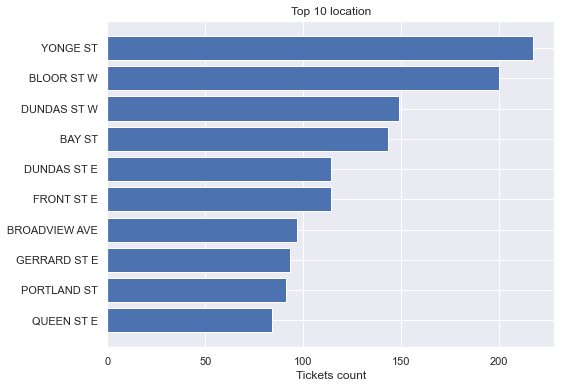

In [89]:
# Plot of Top 10 location3 of tickets count

plot_df = df_torca_tx['location4'].value_counts().head(10)[::-1]
plt.figure(figsize=(8,6))
plt.barh(plot_df.index, plot_df.values)
plt.xlabel('Tickets count')
plt.title('Top 10 location')
plt.show()